# PHY180 - Fitting data to a function
Hopefully if I understand it enough I can use this to graph for the pendulum project.<br>
I believe it's written by Prof. Brian Wilson?

### Modelling Part:
You can probably alter it to better work for you once you get a grasp of it.

This is quoted directly from the comments on the file:<br>

"<br>
This program will find the best fit of a given function to a given set of data (including errorbars). It prints the results, with uncertainties. Then it plots the graph and displays it to the screen, and also saves a copy to a file in the local directory. Below the main graph is a residuals graph, the difference between the data and the best fit line. <br>                                     

There is also a function which will load data from a file. More convenient. The first line of the file is ignored (assuming it's the name of the variables). After that the data file needs to be formatted: ```number space number space number space number newline```. **Do NOT put commas in your data file!! You can use tabs instead of spaces.** The data file should be in the same directory as this python file. The data should be in the order: ```x_data y_data x_uncertainty y_uncertainty```<br>
"

In [2]:
import scipy.optimize as optimize                                                                                
import numpy as np                                                                                               
import matplotlib.pyplot as plt       
import math
from pylab import loadtxt                                                                                        

def load_data(filename):                                                                                         
    data=loadtxt(filename, usecols=(0,1,2,3), skiprows=1, unpack=True)                                           
    return data    

In [30]:
def plot_fit(my_func, xdata, ydata, xerror=None, yerror=None, init_guess=None, font_size=14,                     
             xlabel="Independant Variable (units)", ylabel="Dependent Variable (units)",                         
             title="My Graph Needs a Better Title"):     
                 
    plt.rcParams.update({'font.size': font_size})                                                                
    plt.rcParams['figure.figsize'] = 10, 9  # Change the picture size, useful for 
                                            #the save-to-file option.                                                                                                                                                             
                                                                                                                 
    popt, pcov = optimize.curve_fit(my_func, xdata, ydata, sigma=yerror, p0=init_guess, absolute_sigma=True)     
    # The best fit values are popt[], while pcov[] tells us the uncertainties.                                   
                                                                                                                 
    puncert = np.sqrt(np.diagonal(pcov))                                                                         
    # The uncertainties are the square roots of the diagonal of the covariance matrix                            
                                                                                                                 
    print("Best fit parameters, with uncertainties, but not rounded off properly:")                              
    for i in range(len(popt)):                                                                                   
        print(popt[i], "+/-", puncert[i])                                                                        
                                                                                                                 
    start = min(xdata)                                                                                           
    stop = max(xdata)                                                                                            
    xs = np.arange(start,stop,(stop-start)/1000)                                                                 
    curve = my_func(xs, *popt)                                                                                   
    # (x,y) = (xs,curve) is the line of best fit for the data in (xdata,ydata).                                  
    # It has 1000 points to make it look smooth.                                                                 
    # Note: the "*" tells Python to send all the popt values in a readable way.                                  
                                                                                                                 
    fig, (ax1,ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})                                   
    # Make 2 graphs above/below each other: ax1 is top, ax2 is bottom.                                           
    # The gridspec_kw argument makes the top plot 2 times taller than the bottom plot.                           
    # You can adjust the relative heights by, say, changing [2, 1] to [3, 1].                                    

    # FIRST PLOT: DATA
                 
    ax1.errorbar(xdata, ydata, yerr=yerror, xerr=xerror, fmt=".", label="data", color="black")                   
    # Plot the data with error bars, fmt makes it data points not a line, label is                               
    # a string which will be printed in the legend, you should edit this string.                                 
                                                                                                                 
    ax1.plot(xs, curve, label="best fit", color="black")                                                         
    # Plot the best fit curve on top of the data points as a line.                                               
    # NOTE: you may want to change the value of label to something better!!

    ax1.legend(loc='lower right')                                                                                
    # Prints a box using what's in the "label" strings in the previous two lines.                                
    # loc specifies the location                                                                                 
                                                                                                                 
    ax1.set_xlabel(xlabel)                                                                                       
    ax1.set_ylabel(ylabel)                                                                                       
    #ax1.set_title(title)                                                                                         
    # label the axes and set a title                                                                             
                                                                                                                 
    #ax1.set_xscale('log')                                                                                       
    #ax1.set_yscale('log')                                                                                       
    # uncomment out the above two lines if you want to make it log-log scale                                     

    # SECOND PLOT: RESIDUALS
                 
    residual = ydata - my_func(xdata, *popt)                                                                     
    ax2.errorbar(xdata, residual, yerr=yerror, xerr=xerror, fmt=".", color="black")                              
    # Plot the residuals with error bars.                                                                        
                                                                                                                 
    ax2.axhline(y=0, color="black")                                                                              
    # Plot the y=0 line for context.                                                                             
                                                                                                                 
    ax2.set_xlabel(xlabel)                                                                                       
    ax2.set_ylabel("Residuals")                                                                                  
    # ax2.set_title("Residuals of the fit")                                                                      
    # Here is where you change how your graph is labelled.                                                       
                                                                                                                 
    fig.tight_layout()                                                                                           
    # Does a decent cropping job of the two figures.                                                             
                                                                                                                 
    plt.show()                                                                                                   
    # Show the graph on your screen.                                                                             
                                                                                                                 
    fig.savefig("graph.png")                                                                                     
    # Saves graph, will be overwritten if name stays the same.                                                                             
                                                                                                                 
    return None

### Physics part:

Best fit parameters, with uncertainties, but not rounded off properly:
0.6280502360383791 +/- 0.00421268816891987
0.9735190292294709 +/- 0.008246743151413343


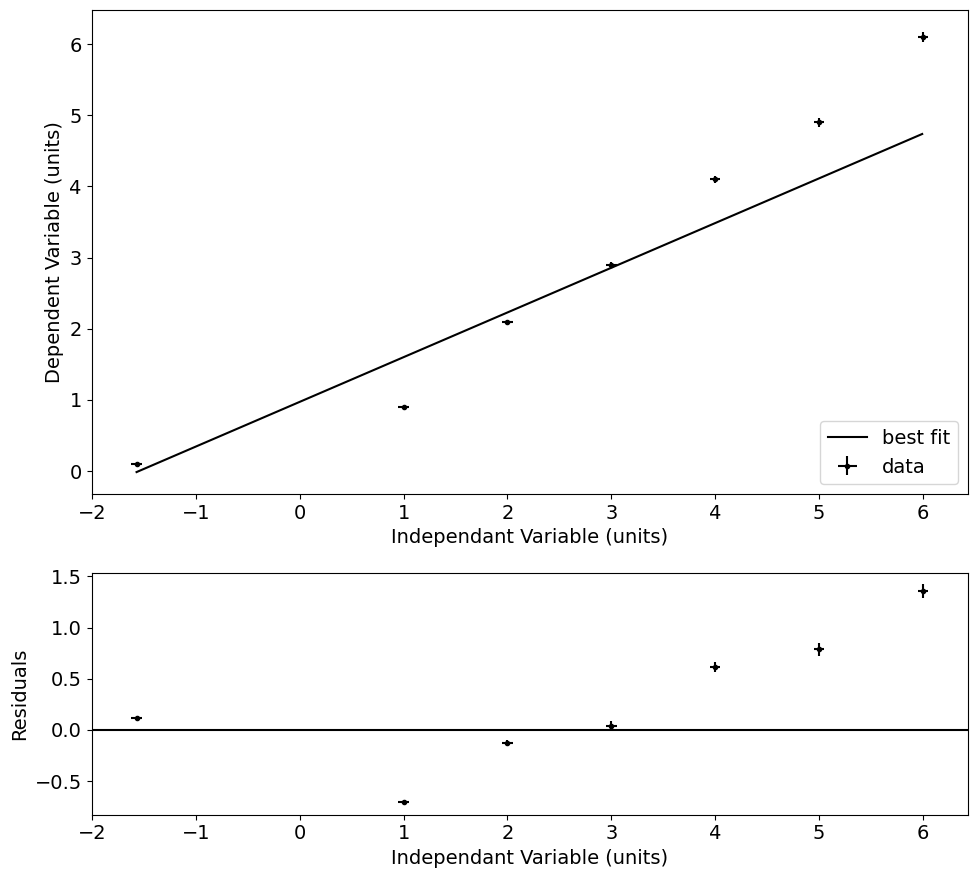

In [32]:
# MANUALLY INSERT DATA

# First, define the function you want to fit. Here it's a linear function.                                       
# It is critical that the independant variable ("t") is first in the list of function variables.                                                                                                                               
def linear(t, m, b):                                                                                             
    return m*t + b                                                                                               

# Next, generate your data and errorbars. One way is to manually insert it here.  
# do math.pi for pi
x = np.array([-math.pi/2, 1, 2, 3, 4, 5, 6])                                                                                 
y = np.array([0.1, 0.9, 2.1, 2.9, 4.1, 4.9, 6.1])                                                                   
xerr = 0.05                                           # xerr and yerr can be a single value…                                                                                                    
yerr = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07]) # …or an array the same length as x & y                                                                                                                                                                         
                                                                                                                 
# Now we make the plot, displayed on screen and saved in the directory, and print the best fit values                                                                                                                         
plot_fit(linear, x, y, xerr, yerr)                                                                                                                                                                                           
                                                                                                                

Best fit parameters, with uncertainties, but not rounded off properly:
0.06413235546674383 +/- 0.004236257085119813
-0.00264419480980807 +/- 0.0033501034863745905
1.1973217714113782 +/- 0.005895869264045166


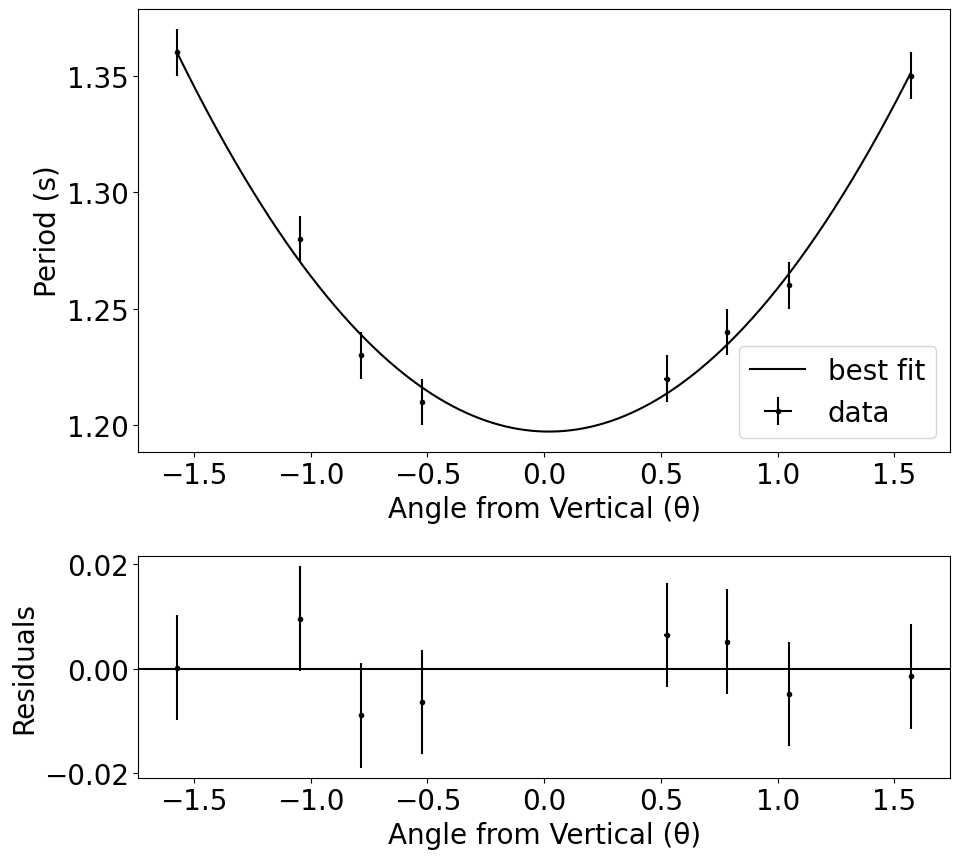

In [33]:
# LOAD DATA FROM CSV FILE                                                
# NOTE: The CSV file should not have commas to separate things! Spaces or tabs are fine.  
#    - Actually, at a later date if you realize it might be easier to work with a proper CSV file you can 
#      try to alter it so commas will work.
                                                                                                                 
# Again, start with a fitting function. This time it is quadratic.                                                                                                                                                                
def quadratic(t, a, b, c):                                                                                       
    return a*t**2 + b*t + c                                                                                      
                                                                                                                 
# Now load the data from the file. The file should be in the same directory as this Python code.                 
# Some chance you will need an absolute path: "C:\\Users\\Brian\\Python\\mydata_fake.txt"
filename="periodangle.txt"                                                                                       
x, y, xerr, yerr = load_data(filename)                                                                        
                                                                                                                 
# This time, let's use every single possible option available to bb.plot_fit()                                   
                                                                                                                 
init_guess = (-0.5, 0, +0.5) # guess for the best fit parameters                                                 
font_size = 20                                                                                                   
xlabel = "Angle from Vertical (θ)"                                                                                              
ylabel = "Period (s)"                                                                                            
                                                                                                                 
# Now we make the plot, displayed on screen and saved in the directory, and print the best fit values            
plot_fit(quadratic, x, y, xerr, yerr, init_guess=init_guess, font_size=font_size,                             
            xlabel=xlabel, ylabel=ylabel)                                                                        
                                                                                                                 
# Note: for sinusoidal functions, guessing the period correctly with init_guess is critical